In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np


%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
raw=pd.read_csv('DXYArea.csv',parse_dates=['updateTime'])
raw['year'],raw['month'],raw['day']=list(zip(*raw['updateTime'].apply(lambda d:(d.year,d.month,d.day))))
temp=raw.sort_values(['provinceName','updateTime'],
                     ascending=False,
                     ignore_index=True).groupby('provinceName')\
.first()\
.reset_index(drop=False)\
.loc[:,['provinceName',
        'provinceEnglishName',
        'province_confirmedCount',
        'province_suspectedCount',
        'province_curedCount',
        'province_deadCount']]

temp.head()

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
0,上海市,Shanghai,342,0,314,3
1,云南省,Yunnan,174,0,170,2
2,内蒙古自治区,Neimenggu,75,0,70,1
3,北京市,Beijing,428,0,308,8
4,吉林省,Jilin,93,0,90,1


In [3]:
# 设置matplotlib绘图模式为嵌入式
%matplotlib inline 


# 读入中国领土面数据
china = gpd.read_file('china-shapefiles/china.shp',
                     encoding='utf-8')

china = china.dissolve(by='OWNER').reset_index(drop=False)


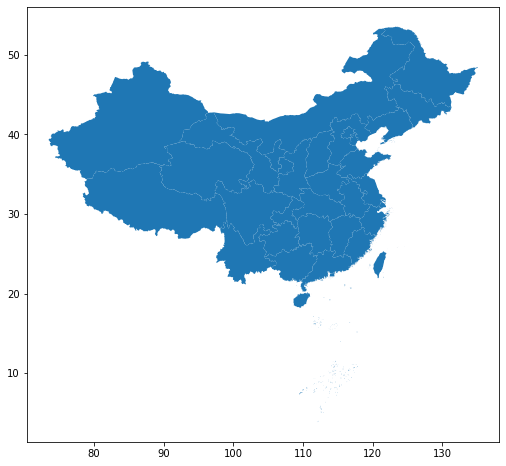

In [4]:
# 初始化图床
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.plot(ax=ax)



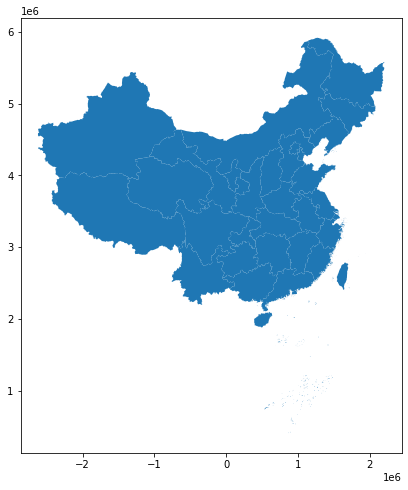

In [5]:
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax)


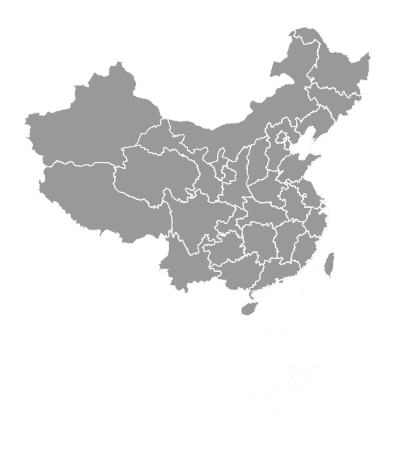

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             alpha=0.8)
ax.axis('off') # 移除坐标轴
fig.savefig('图4.png', dpi=300)

/var/folders/0t/v8kbsrzd0sjbwy2r74mnqt100000gn/T/ipykernel_30893/3162396368.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax = china.geometry.centroid.to_crs(albers_proj).plot(ax=ax,


(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

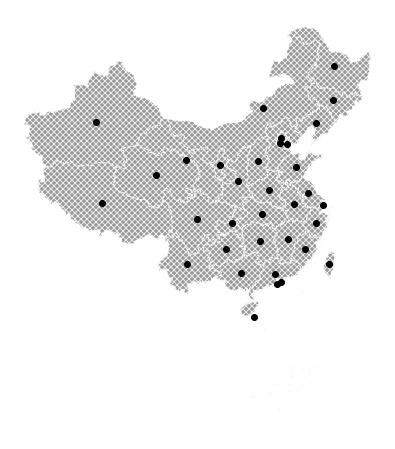

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='xxxx',
                                             alpha=0.8)
ax = china.geometry.centroid.to_crs(albers_proj).plot(ax=ax,
                                                      facecolor='black')
ax.axis('off') # 移除坐标轴
#fig.savefig('图11.png', dpi=300)

In [8]:
data_with_geometry = pd.merge(left=temp.replace('澳门', '澳门特别行政区'),
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='right'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'province_confirmedCount',
                                        'province_suspectedCount',
                                        'province_curedCount',
                                        'province_deadCount',
                                        'geometry'
                                        ]]

# 将数据从DataFrame转换为GeoDataFrame
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,geometry
0,上海市,Shanghai,342.0,0.0,314.0,3.0,"MULTIPOLYGON (((121.42610 30.68615, 121.42580 ..."
1,云南省,Yunnan,174.0,0.0,170.0,2.0,"POLYGON ((105.30025 27.70911, 105.29577 27.698..."
2,内蒙古自治区,Neimenggu,75.0,0.0,70.0,1.0,"POLYGON ((121.48938 53.33117, 121.49769 53.320..."
3,北京市,Beijing,428.0,0.0,308.0,8.0,"POLYGON ((117.37974 40.22687, 117.38528 40.223..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((119.41590 23.21011, 119.43546 ..."
5,吉林省,Jilin,93.0,0.0,90.0,1.0,"POLYGON ((123.17773 46.24767, 123.18046 46.248..."
6,四川省,Sichuan,539.0,0.0,464.0,3.0,"POLYGON ((105.49535 32.91074, 105.49502 32.905..."
7,天津市,Tianjin,136.0,0.0,128.0,3.0,"MULTIPOLYGON (((117.69897 39.00224, 117.70893 ..."
8,宁夏回族自治区,Ningxia,75.0,0.0,71.0,0.0,"MULTIPOLYGON (((106.05844 35.43237, 106.05807 ..."
9,安徽省,Anhui,990.0,0.0,984.0,6.0,"POLYGON ((116.36870 34.64072, 116.37081 34.639..."


(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

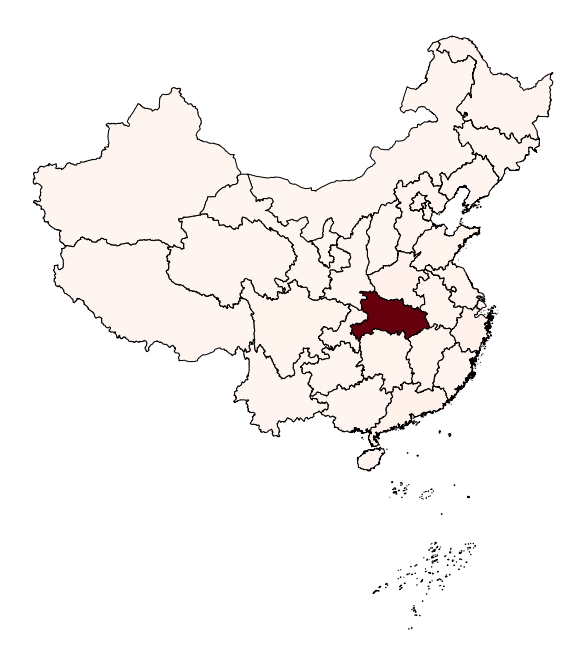

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

# 新增缺失值处理参数
ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
#                                                 missing_kwds={
#                                                     "color": "lightgrey",
#                                                     "edgecolor": "black",
#                                                     "hatch": "////"
#                                                 })
                                                )



ax.axis('off')


(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

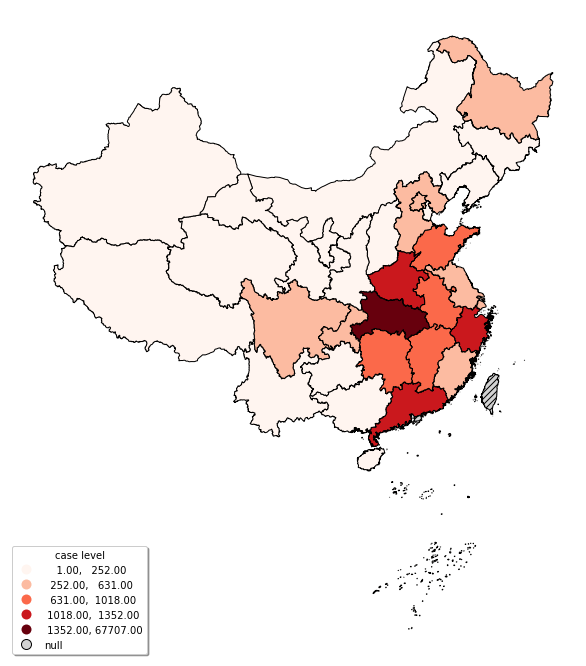

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////",
                                                     "label": "null"
                                                 },
                                                 legend=True,
                                                 scheme='NaturalBreaks',
                                                 k=5,
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': 'case level',
                                                     'shadow': True
                                                 })



ax.axis('off')

(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

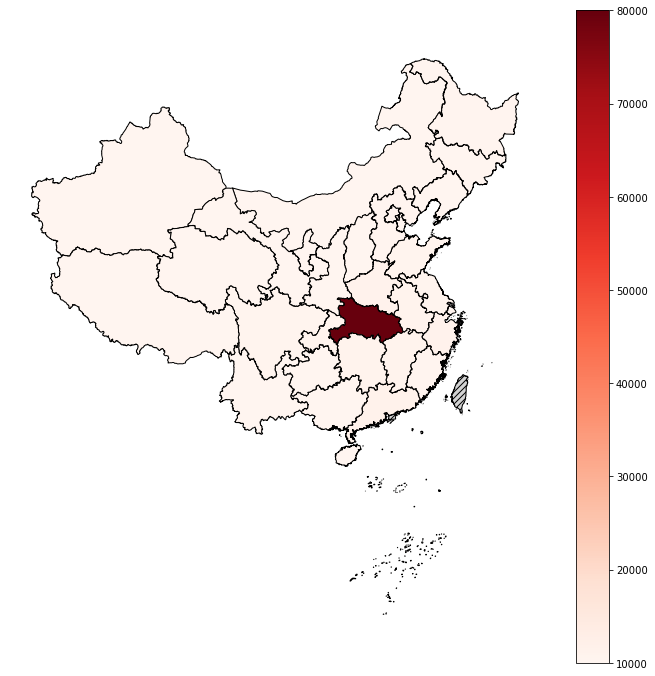

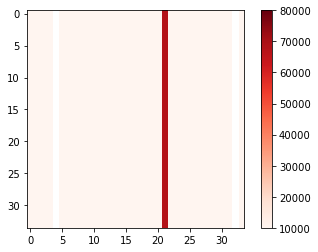

In [12]:

fig, ax = plt.subplots(figsize=(12, 12))

pic=data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////"
                                                 },
                                                 
                                                 legend=False)

value=[]
df=data_with_geometry.to_crs(albers_proj)
# print(type(data_with_geometry.to_crs(albers_proj))) 
# print(data_with_geometry.to_crs(albers_proj))
#获取province_confirmedCount的值组成list
for it in df.iloc:
   v=df.loc[it.name,'province_confirmedCount']
   value.append(v)

fig2,ax2=plt.subplots()
img=np.zeros((len(value),len(value)))
for i in range(len(value)):#扩展list成为一个二维矩阵，用来实现imshow画图
    img[:,i]=value[i]
pic2=ax2.imshow(img,cmap='Reds',vmin=10000,vmax=80000)#随意控制colorbar的范围
plt.colorbar(pic2)
fig.colorbar(pic2,ax=ax)#把ax2的colorbar画在ax上
ax.axis('off')



In [30]:
data_with_geometry = pd.merge(left=temp.replace('澳门', '澳门特别行政区'),
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='right'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'province_confirmedCount',
                                        'province_suspectedCount',
                                        'province_curedCount',
                                        'province_deadCount',
                                        'geometry'
                                        ]]
data_with_geometry=data_with_geometry[(data_with_geometry['provinceEnglishName']=="Shanxi")|(data_with_geometry['provinceEnglishName']=="Henan")
                                     |(data_with_geometry['provinceEnglishName']=="Hubei")|(data_with_geometry['provinceEnglishName']=="Shaanxi")]
data_with_geometry.loc[21,"province_confirmedCount"]=100
data_with_geometry.loc[18,"province_confirmedCount"]=300
data_with_geometry.loc[11,"province_confirmedCount"]=60
data_with_geometry.loc[30,"province_confirmedCount"]=122

                                      
# 将数据从DataFrame转换为GeoDataFrame
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,geometry
11,山西省,Shanxi,60.0,0.0,126.0,0.0,"POLYGON ((114.12488 40.74365, 114.13085 40.738..."
18,河南省,Henan,300.0,0.0,1247.0,22.0,"MULTIPOLYGON (((111.00577 33.17373, 111.00714 ..."
21,湖北省,Hubei,100.0,0.0,45235.0,2986.0,"MULTIPOLYGON (((110.98971 33.24940, 110.99007 ..."
30,陕西省,Shaanxi,122.0,0.0,227.0,1.0,"POLYGON ((111.11640 39.36374, 111.11701 39.363..."


[60.0, 300.0, 100.0, 122.0]


(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

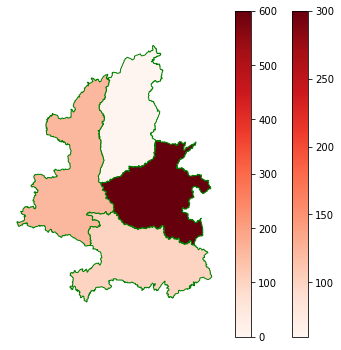

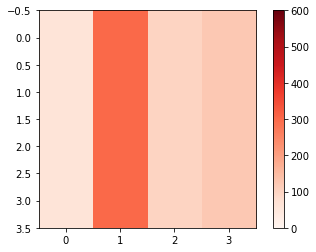

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='green',
                                                 legend=True
                                                 
                                                 )
value=[]
df=data_with_geometry.to_crs(albers_proj)
# print(type(data_with_geometry.to_crs(albers_proj))) 
# print(data_with_geometry.to_crs(albers_proj))
#获取province_confirmedCount的值组成list
for it in df.iloc:
   v=df.loc[it.name,'province_confirmedCount']
   value.append(v)
    
print(value)

fig2,ax2=plt.subplots()
img=np.zeros((len(value),len(value)))
for i in range(len(value)):#扩展list成为一个二维矩阵，用来实现imshow画图
    img[:,i]=value[i]
    

pic2=ax2.imshow(img,cmap='Reds',vmin=0,vmax= 600)#随意控制colorbar的范围
plt.colorbar(pic2)
fig.colorbar(pic2,ax=ax)#把ax2的colorbar画在ax上


ax.axis('off')

binery：


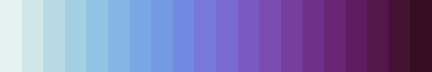

sequence:


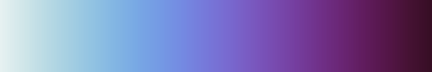

In [17]:
from palettable.cmocean.sequential import Dense_20

print('binery：')
Dense_20.show_discrete_image()
print('sequence:')
Dense_20.show_continuous_image()

(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

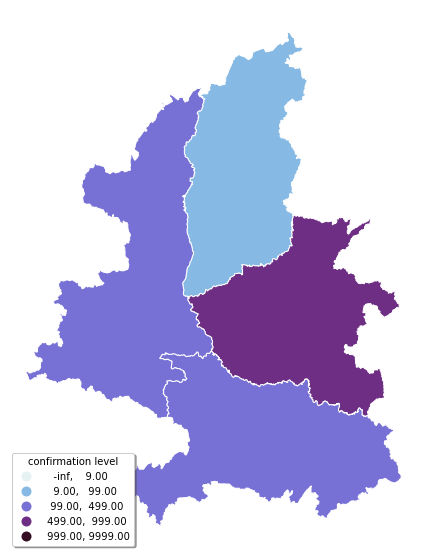

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=Dense_20.mpl_colormap,
                                                 edgecolor='white',
  
                                                 legend=True,
                                                 scheme='UserDefined',
                                                 classification_kwds={
                                                     'bins': [9, 99, 499, 999, 9999]
                                                 },
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': 'confirmation level',
                                                     'shadow': True
                                                 }
                                                )


ax.axis('off')


(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

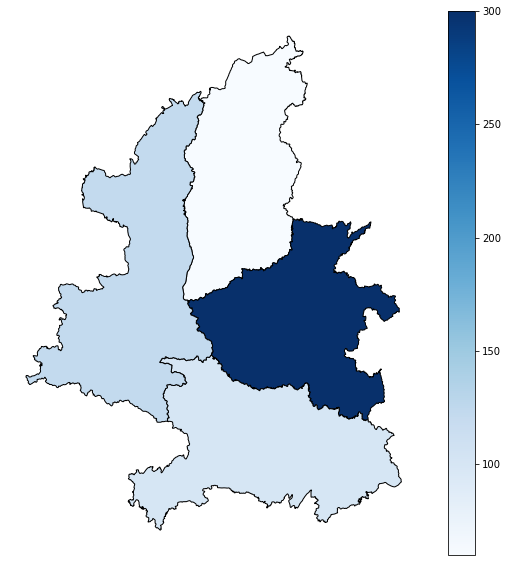

In [40]:
from palettable.colorbrewer.sequential import Blues_9
fig, ax = plt.subplots(figsize=(10, 10))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=Blues_9.mpl_colormap,
                                                 edgecolor='black',

                                                 legend=True,
 
)


ax.axis('off')

(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

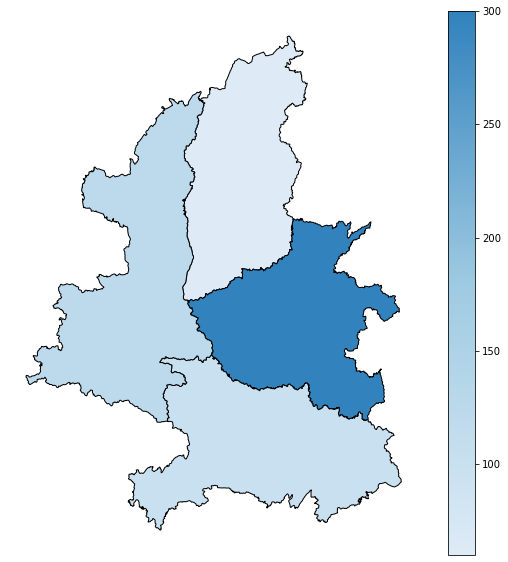

In [39]:
from palettable.colorbrewer.sequential import Blues_3
fig, ax = plt.subplots(figsize=(10, 10))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=Blues_3.mpl_colormap,
                                                 edgecolor='black',

                                                 legend=True,
 
)


ax.axis('off')

(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

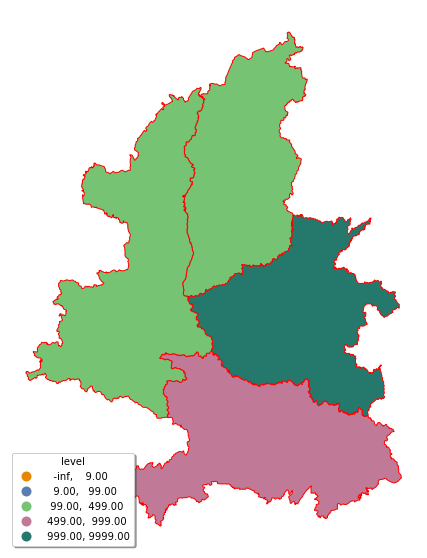

In [23]:
from palettable.cartocolors.qualitative import Vivid_6
fig, ax = plt.subplots(figsize=(10, 10))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=Vivid_6.mpl_colormap,
                                                 edgecolor='red',

                                                 legend=True,
                                                 scheme='UserDefined',
                                                 classification_kwds={
                                                     'bins': [9, 99, 499, 999, 9999]
                                                 },
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': 'level',
                                                     'shadow': True
                                                 })


ax.axis('off')

In [41]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)